# Sorting Basics
## Non-Comparison Sorts
Non-comparison sorting algorithms exploit properties of numbering elements. E.G. peeling a most-significant digit off an integer to perform _postman sort_ or peeling off the least-significant digit for a _radix sort_. If the only thing we know is the ability to use a $\lt$ operator, then we must use a __comparison sort__.
## Comparison Sort<a id='compsort_bounds'></a>
Comparison sorting algorithms use the $\lt$ operator to _compare_ elements.  
__All sorts that operate using comparisons are bounded $\in O(n \cdot log(n))$__.
### Proof that all comparision sorts are $\in O(n \cdot log(n))$ 
* An array of $n$ values can be arranged in $n!$ unique permutations (for the sake of simplicity assume there are no duplicate elements).
* The goal of a sort is to find the 1 unique sorted permutation (though if we _do_ have duplicate elements there will be $\gt 1$ sorted permutation which actually makes sorting easier).
* Optimally, each comparison will contribute 1 bit of information. And each optimal bit of information will __bisect__ the space of $n!$ unsorted arrays.
  
Using this strategy, a sort constructs a decision tree which iteratively divides the $n!$ space in half during each comparison until we reach the unique sorted ordering.  
The longest path from the root node in this decision tree to _any_ leaf will be the number of comparisons necessary to sort the array, so 
an optimal sort would be balanced such that the length of every path is equal. 
#### Deriving the Upper and Lower Bound
The depth of a balanced binary decision tree with $n!$ leaves will be $$log_2(n!)= log(n \cdot (n-1) \cdot (n-2) \cdot \cdot \cdot 3 \cdot 2 \cdot 1) \\
= log(n) + log(n-1) + log(n-2) + ... + log(3) + log(2) + log(1)$$  
We can disregard the base 2 as we are unconcerned with constants. 
##### Lower Bound
$$log(n!) = log(n) + log(n-1) + log(n-2) + ... + log(3) + log(2) + log(1) \\
\gt log(n)+log(n-1)+log(n-2)+...+log(\frac{n}{2}) + 0 + .... + 0+0+0 \\
\gt \underbrace{log(\frac{n}{2}) + log(\frac{n}{2})+ log(\frac{n}{2}) + ... + log(\frac{n}{2})}_{\frac{n}{2} \text terms} + 0 + ... + 0 + 0 + 0 \\
= \frac{n}{2} \cdot log(\frac{n}{2})  \\
= \frac{n}{2}(log(n) - log(2))  \\
\in \Omega(n \cdot log(n))
$$
This shows that no comparision sort that has ever or will be created can have a runtime more efficient than $n \cdot log(n)$ .  
In an optimal sort, one that perfectly bisects the space of unsorted arrays every time, will have a balanced decision tree constrained by the time space bounds $\Omega(n \cdot log(n))$. 
##### Upper bound 
$$log(n!) = log(n) + log(n-1) + ... + log(3)+log(2)+log(1) \\
\lt log(n) + log(n) + log(n) + ... + log(n) + log(n)
= n \cdot log(n)  \\
\in O(n \cdot log(n))$$
An optimal comparison sort will have an upper bound of $O(n \cdot log(n))$. This isn't all that amazing of a derivation. It shows that the worst case of an optimally designed sorting algorithm should not be substantially worse than $n \cdot log(n)$ given any array. 
##### Theta Bound
Thus we see that $log_2(n!) \in \Theta(n \cdot log(n))$ 
### Runtime Bounds of Common Comparison Sorts
| Algorithm | Best Case | Worst Case | Average Case |
|---------------|-----------|------------|--------------|
|Selection Sort | $n^2$ | $n^2$ | $n^2$ |
|Merge sort | $n\cdot log(n)$ | $n\cdot log(n)$ | $n\cdot log(n)$ |
|Quicksort | $n\cdot log(n)$ | $n^2$ | $n\cdot log(n)$ |


# Merge Sort (Partition and Slide)
Merge sort is fast, but it takes $O(n \cdot log(n))$ space complexity.
  
Merge sort has a recurrence $r(n)=2r(\frac{n}{2}) + n$

# Quicksort (Pivot and Swap)
Quicksort is famous for its ability to sort in place. It directly modifies the contents of the list and uses $O(1)$ space complexity for temporary storage. 

## Method
Pivot and Swap

In [14]:
# Quicksort implementation
def swap_indices(arr, i, j):
    temp = arr[i]
    arr[i] = arr[j]
    arr[j] = temp
def quicksort(arr, start_ind, end_ind):
    n=end_ind - start_ind + 1
    # any list of length 1 is already sorted:
    if n <= 1:
        return
    # choose a random pivot element in {start_ind, ..., end_ind}
    pivot_index = np.random.randint(start_ind, end_ind+1)
    pivot = arr[pivot_index]
    
    # count values < pivot:
    vals_lt_pivot=0
    
    for i in xrange(start_ind, end_ind+1):
    if arr[i] < pivot:
        vals_lt_pivot += 1
        
    # place pivot at arr[vals_lt_pivot], since vals_lt_pivot will need to
    # come before it
    swap_indices(arr, pivot_index, start_ind+vals_lt_pivot)
    # move the pivot index
    pivot_index = start_ind+vals_lt_pivot
    
    vals_lt_pivot = 0
    for i in range(start_ind, end_ind+1):
        if arr[i] < pivot:
            swap_indices(arr, i, start_ind+vals_lt_pivot)
            vals_lt_pivot += 1

## Runtime Analysis
### Worst-case Runtime Using a Median Pivot Element
The optimal _pivot element_ to select during this sort is the __median__ because the median element will have $\frac{n-1}{2}$ elements $\le$ to it and $\frac{n-1}{2}$ values $\ge$ it. Thus, the runtime of using the median would be given by the recurrence
$$r(n)=2r(\frac{n-1}{2})+\Theta(n), \\
\lt 2r(\frac{n}{2})+\Theta(n)$$  
We see this is 

### Expected Runtime Using a Random Pivot Element
Denote the operation where elements $i$ and $j$ are compared using the random variable $C_{i,j}$:
$$C_{i,j} 
= 
\begin{cases}
1 & \text{ elements i and j are compared} \\
0 & \text{ else }
\end{cases}
$$
So, (excluding the cost of recursion overhead) the total number of comparisons that will occur in the sort will be the sum of comparisons on _all unique pairs_ of $i$ and $j$. 
$$\sum_{\{i,j\}:i\ne j}{C_{i,j}}$$
$\{i,j\}:i\ne j$ is the set of all pairs of $i$ and $j$ in the array where $i$ and $j$ are not equal.  
  
The expected value of comparisons between elements $i$ and $j$ ($\mathbb{E}[C_{i,j}]$) will be governed by $p_{i,j}$, the probability of whether elements $i$ and $j$ are ever compared. If the **pivot element $x$** has a **_value_ between $i$ or $j$, $p_{i,j} = 0$**
  
Variables $r_i$ and $r_j$ give the _index (rank)_ of elements $i$ and $j$
$$p_{i,j} = \frac{2}{| r_j - r_i | + 1}$$ 
  
The expected value of comparisons between elements  𝑖  and  𝑗  ( 𝔼[𝐶𝑖,𝑗] )

$$\mathbb{E}[C_{i,j}]=p_{i,j} \cdot 1 + (1 - p_{i,j}) \cdot 0 = p_{i,j}$$ 
  
The sum of the expected comparisons during runtime:
  
$$\mathbb{E}[\sum_{\{i,j\}:i\ne j}]= \sum_{\{i,j\}:i\ne j}\mathbb{E}[C_{i,j}]$$

In [2]:
import numpy
import pylab
import random 

def empirical_probability_of_comparison(x,x_sorted, i, j):
    smaller_val = min(x[i], x[j])
    larger_val  = max(x[i], x[j])
    pivots_between = 0
    pivots_comparing_values_at_i_and_j = 0
    for val in x_sorted:
        if val >= smaller_val and val <= larger_val:
            pivots_between += 1
        if val == smaller_val or val == larger_val:
            pivots_comparing_values_at_i_and_j += 1
        # pivot selections outside of {i, i+1, ... , j} do not affect whether we compare
    return float(pivots_comparing_values_at_i_and_j) / pivots_between
        
def algebraic_probability_of_comparison(x,x_sorted,i,j):
    r_i = x_sorted.index(x[i]) # get the rank of i
    r_j = x_sorted.index(x[j]) # get the rank of j
    return 2.0 / (numpy.abs(r_j - r_i) + 1)


def total_expected_comparisons(x, x_sorted):
    result = 0.0
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            result += algebraic_probability_of_comparison(x,x_sorted,i,j)
    return result
    
# x should have unique elements for this line of analysis:
x = [9,1,7,8,2,5,4,3,11,16,99,45,22]
x_sorted = sorted(x)
i=2
j=4

# Question 1
print("1. What is the expected number of operations that will be used to compare the value at i = {} to the value at j = {}?\n".format(i,j))

# Estimate C_{i,j} empirically:
print("Empirical estimate of probability i and j are compared: Pr(C_{i,j}=1): ",empirical_probability_of_comparison(x,x_sorted,i,j))
# Estimate C_{i,j} using formula in the notes:
print ("Algebraic estimate of probability i and j are compared: Pr(C_{i,j}=1): ",algebraic_probability_of_comparison(x,x_sorted,i,j))
print("\n")

# Question 2
print("2. What is the total expected number of comparisons?\n")
print("Total expected comparisons: ", total_expected_comparisons(x, x_sorted))


1. What is the expected number of operations that will be used to compare the value at i = 2 to the value at j = 4?

Empirical estimate of probability i and j are compared: Pr(C_{i,j}=1):  0.4
Algebraic estimate of probability i and j are compared: Pr(C_{i,j}=1):  0.4


2. What is the total expected number of comparisons?

Total expected comparisons:  37.04374514374513


Calculating for array size: 4
Calculating for array size: 8
Calculating for array size: 16
Calculating for array size: 32
Calculating for array size: 64
Calculating for array size: 128
Calculating for array size: 256
Calculating for array size: 512
Calculating for array size: 1024
Calculating for array size: 2048


Text(0, 0.5, 'Expected Comparisons')

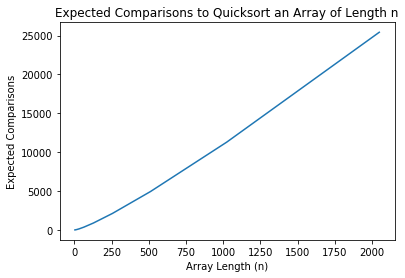

In [13]:
# Question 3
# Plot the number of expected comparisons 
#
# This is going to take some SERIOUS processing power
#
from matplotlib import pyplot

# Make some arrays to play with
array_start = 4 
array_max = 2048 
array_len = [array_start] # _n_ elements in array, x axis
expected_comparisons = [] # E(C_{i,j}) Expected comparisons, y axis
# Assuming no repeating elements
test_array = random.sample(range(array_max), array_max)
while array_len[-1]<= array_max: 
    print("Calculating for array size: {}".format(array_len[-1]))
    expected_comparisons.append(
        total_expected_comparisons(test_array[:array_len[-1]], 
                                   sorted(test_array[:array_len[-1]])))
    array_len.append(array_len[-1]*2) # Previous * 2


l = len(expected_comparisons) # We don't calculate for that last value

fig, ax = pyplot.subplots()
ax.plot(array_len[:l], expected_comparisons)

ax.set_title("Expected Comparisons to Quicksort an Array of Length n")
ax.set_xlabel('Array Length (n)')
ax.set_ylabel('Expected Comparisons')

### Median of Medians
Q: Why use block size 5?  
A: We could get problems that do not decay. There will not be impovement. $n log(n)$ will be our recursion depth, then.

## Check if an Array is Sorted
$check\_sorted() \in O(n)$

In [2]:
def check_if_sorted(array):
    for i in range(len(array)-1):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-2-d83cab6ec05d>, line 3)